<a href="https://colab.research.google.com/github/KJOELJOYSON2427/Linear_Regression_Model/blob/main/Copy_of_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np

In [20]:
from abc import abstractclassmethod
class Linear_Regression():
  @abstractclassmethod
  def __init__(self):
    pass

  @abstractclassmethod
  def fit(self):
    pass
  @abstractclassmethod
  def update_weights(self):
    pass
  @abstractclassmethod
  def predict(self):
    pass

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [36]:
class LinearRegression(Linear_Regression):
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # self.y=y # Removed this line as self.y is not needed in fit

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Approximate y with linear combination of weights and x, plus bias

            y_predicted = self.predict(X)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.update_weights(dw, db)

    def update_weights(self, dw, db):
        # Update weights and bias using gradients and learning rate
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        # Calculate predictions
        y_predicted = np.dot(X, self.weights) + self.bias
        # Removed the printing loop from here
        return y_predicted

# Linear Regression Implementation

This notebook contains a Python implementation of Linear Regression using gradient descent.

## Class: `Linear_Regression` (Abstract Base Class)
This class serves as an abstract base class defining the required methods for a linear regression model:
- `__init__()`: Constructor
- `fit()`: Method for training the model
- `update_weights()`: Method for updating model weights
- `predict()`: Method for making predictions

## Class: `LinearRegression`
This class inherits from `Linear_Regression` and provides a concrete implementation of the linear regression algorithm using gradient descent.

### Parameters:
- `learning_rate`: The step size for updating weights during gradient descent.
- `n_iterations`: The number of iterations for the gradient descent algorithm.

### Methods:
- `__init__(self, learning_rate=0.01, n_iterations=1000)`: Initializes the learning rate, number of iterations, and sets initial weights and bias to None.
- `fit(self, X, y)`: Trains the model using the provided input features `X` and target variable `y`. It initializes weights and bias, then iteratively updates them using gradient descent for a specified number of iterations.
- `update_weights(self, dw, db)`: Updates the model's weights and bias based on the calculated gradients (`dw` and `db`) and the learning rate.
- `predict(self, X)`: Predicts the output for the given input features `X` using the learned weights and bias.

## Gradient Descent Details:
The `fit` method uses gradient descent to minimize the mean squared error. The gradients for the weights (`dw`) and bias (`db`) are calculated as follows:

$dw = \frac{1}{n\_samples} \cdot X^T \cdot (y\_{predicted} - y)$

$db = \frac{1}{n\_samples} \cdot \sum (y\_{predicted} - y)$

Where:
- $n\_samples$ is the number of training samples.
- $X$ is the input feature matrix.
- $X^T$ is the transpose of the input feature matrix.
- $y\_{predicted}$ is the vector of predicted outputs.
- $y$ is the vector of actual outputs.

The weights and bias are updated in each iteration using the following rules:

$weights = weights - learning\_rate \cdot dw$

$bias = bias - learning\_rate \cdot db$

In [ ]:
import numpy as np

# Sample data
X = np.array([[1, 2],
              [3, 4],
              [5, 6]]) # 3 samples, 2 features

y = np.array([7, 8, 9]) # Actual outputs

# Example predicted outputs (could be from an initial guess or previous iteration)
y_predicted = np.array([6.5, 8.2, 9.8])

# Calculate the error
error = y_predicted - y

# Calculate the dot product of X.T and the error
dot_product_result = np.dot(X.T, error)

print("X (input features):\n", X)
print("\nX.T (transpose of X):\n", X.T)
print("\ny (actual outputs):\n", y)
print("\ny_predicted (predicted outputs):\n", y_predicted)
print("\nerror (y_predicted - y):\n", error)
print("\nnp.dot(X.T, error) (dot product of X.T and error):\n", dot_product_result)

X (input features):
 [[1 2]
 [3 4]
 [5 6]]

X.T (transpose of X):
 [[1 3 5]
 [2 4 6]]

y (actual outputs):
 [7 8 9]

y_predicted (predicted outputs):
 [6.5 8.2 9.8]

error (y_predicted - y):
 [-0.5  0.2  0.8]

np.dot(X.T, error) (dot product of X.T and error):
 [4.1 4.6]


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

In [2]:
salary_data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

In [4]:
salary_data.shape

(40, 2)

This cell imports the `pandas` and `train_test_split` libraries, which will be used for data manipulation and splitting the dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

This cell loads the salary data from a GitHub repository into a pandas DataFrame.

In [ ]:
salary_data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

This cell displays the shape of the DataFrame, showing the number of rows and columns.

In [ ]:
salary_data.shape

This cell is currently empty, but it can be used to add further code for data preprocessing, model training, or evaluation.

In [6]:
salary_data.isnull().sum()

,0
Experience Years,0
Salary,0


In [9]:
#feature extraction and target
print(salary_data.iloc[:,:-1].values,salary_data.iloc[:,1].values)
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

[[ 1.1]
 [ 1.2]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.5]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.5]
 [ 3.7]
 [ 3.8]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.3]
 [ 4.5]
 [ 4.7]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.5]
 [ 5.9]
 [ 6. ]
 [ 6.2]
 [ 6.5]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.5]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343  42774  46205  37731  43525  39891  48266  56642  60150  54445
  64445  60000  57189  60200  63218  55794  56957  57081  59095  61111
  64500  67938  66029  83088  82200  81363  93940  91000  90000  91738
  98273 101302 113812 111620 109431 105582 116969 112635 122391 121872]


In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.33, random_state=2)

In [16]:
print(X_train,Y_train)

[[ 4. ]
 [ 1.2]
 [ 8.5]
 [ 5.3]
 [ 5.9]
 [ 4.5]
 [ 8.2]
 [ 3.2]
 [ 2. ]
 [ 2.5]
 [ 1.5]
 [ 8.7]
 [ 2.2]
 [ 6.5]
 [ 4.7]
 [ 6. ]
 [10.5]
 [ 4.9]
 [ 9. ]
 [ 7.9]
 [ 2.9]
 [ 3.5]
 [ 4.3]
 [ 5.1]
 [ 3. ]
 [ 4. ]] [ 56957  42774 111620  83088  81363  61111 113812  64445  43525  48266
  37731 109431  39891  90000  64500  93940 121872  67938 105582 101302
  56642  60000  59095  66029  60150  55794]


In [52]:
linear_model=LinearRegression(0.01, 1000)
linear_model.fit(X_train,Y_train)

In [54]:
print('weight=', linear_model.weights[0])
print('bias=', linear_model.bias)

weight= 10213.107848016378
bias= 21269.313218571035


In [53]:
test_data_prediction=linear_model.predict(X_test)

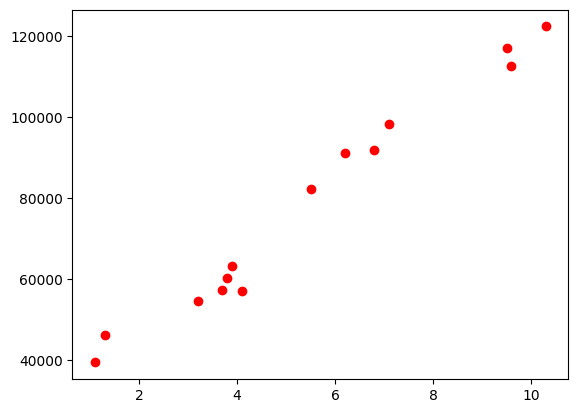

In [55]:
plt.scatter(X_test, Y_test, color="red")

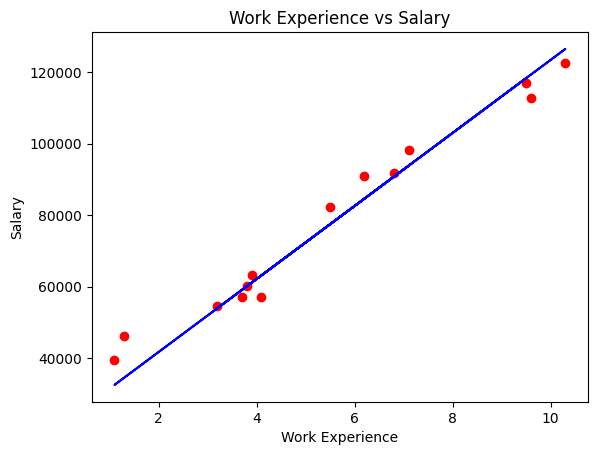

In [56]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, test_data_prediction, color="blue")
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Work Experience vs Salary')
plt.show()

This cell imports the NumPy library, which is commonly used for numerical operations in Python.

In [57]:
import numpy as np

This cell defines an abstract base class `Linear_Regression` using Python's `abc` module. It outlines the essential methods (`__init__`, `fit`, `update_weights`, and `predict`) that any concrete linear regression implementation should have.

In [58]:
from abc import abstractclassmethod
class Linear_Regression():
  @abstractclassmethod
  def __init__(self):
    pass

  @abstractclassmethod
  def fit(self):
    pass
  @abstractclassmethod
  def update_weights(self):
    pass
  @abstractclassmethod
  def predict(self):
    pass

This cell mounts your Google Drive to the Colab environment, allowing you to access files stored in your Drive.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This cell defines the `LinearRegression` class, which inherits from the abstract `Linear_Regression` class. It implements the linear regression algorithm using gradient descent.

In [60]:
class LinearRegression(Linear_Regression):
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # self.y=y # Removed this line as self.y is not needed in fit

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Approximate y with linear combination of weights and x, plus bias

            y_predicted = self.predict(X)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.update_weights(dw, db)

    def update_weights(self, dw, db):
        # Update weights and bias using gradients and learning rate
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        # Calculate predictions
        y_predicted = np.dot(X, self.weights) + self.bias
        # Removed the printing loop from here
        return y_predicted

This cell contains a markdown explanation of the Linear Regression implementation, including details about the classes and the gradient descent algorithm.

# Linear Regression Implementation

This notebook contains a Python implementation of Linear Regression using gradient descent.

## Class: `Linear_Regression` (Abstract Base Class)
This class serves as an abstract base class defining the required methods for a linear regression model:
- `__init__()`: Constructor
- `fit()`: Method for training the model
- `update_weights()`: Method for updating model weights
- `predict()`: Method for making predictions

## Class: `LinearRegression`
This class inherits from `Linear_Regression` and provides a concrete implementation of the linear regression algorithm using gradient descent.

### Parameters:
- `learning_rate`: The step size for updating weights during gradient descent.
- `n_iterations`: The number of iterations for the gradient descent algorithm.

### Methods:
- `__init__(self, learning_rate=0.01, n_iterations=1000)`: Initializes the learning rate, number of iterations, and sets initial weights and bias to None.
- `fit(self, X, y)`: Trains the model using the provided input features `X` and target variable `y`. It initializes weights and bias, then iteratively updates them using gradient descent for a specified number of iterations.
- `update_weights(self, dw, db)`: Updates the model's weights and bias based on the calculated gradients (`dw` and `db`) and the learning rate.
- `predict(self, X)`: Predicts the output for the given input features `X` using the learned weights and bias.

## Gradient Descent Details:
The `fit` method uses gradient descent to minimize the mean squared error. The gradients for the weights (`dw`) and bias (`db`) are calculated as follows:

$dw = \frac{1}{n\_samples} \cdot X^T \cdot (y\_{predicted} - y)$

$db = \frac{1}{n\_samples} \cdot \sum (y\_{predicted} - y)$

Where:
- $n\_samples$ is the number of training samples.
- $X$ is the input feature matrix.
- $X^T$ is the transpose of the input feature matrix.
- $y\_{predicted}$ is the vector of predicted outputs.
- $y$ is the vector of actual outputs.

The weights and bias are updated in each iteration using the following rules:

$weights = weights - learning\_rate \cdot dw$

$bias = bias - learning\_rate \cdot db$

This cell demonstrates how to perform matrix operations (specifically, the dot product of the transpose of X and the error) using NumPy. It uses sample data to illustrate the calculation of a part of the gradient descent update.

In [61]:
import numpy as np

# Sample data
X = np.array([[1, 2],
              [3, 4],
              [5, 6]]) # 3 samples, 2 features

y = np.array([7, 8, 9]) # Actual outputs

# Example predicted outputs (could be from an initial guess or previous iteration)
y_predicted = np.array([6.5, 8.2, 9.8])

# Calculate the error
error = y_predicted - y

# Calculate the dot product of X.T and the error
dot_product_result = np.dot(X.T, error)

print("X (input features):\n", X)
print("\nX.T (transpose of X):\n", X.T)
print("\ny (actual outputs):\n", y)
print("\ny_predicted (predicted outputs):\n", y_predicted)
print("\nerror (y_predicted - y):\n", error)
print("\nnp.dot(X.T, error) (dot product of X.T and error):\n", dot_product_result)

X (input features):
 [[1 2]
 [3 4]
 [5 6]]

X.T (transpose of X):
 [[1 3 5]
 [2 4 6]]

y (actual outputs):
 [7 8 9]

y_predicted (predicted outputs):
 [6.5 8.2 9.8]

error (y_predicted - y):
 [-0.5  0.2  0.8]

np.dot(X.T, error) (dot product of X.T and error):
 [4.1 4.6]


This cell imports the `pandas`, `train_test_split`, and `matplotlib.pylab` libraries. Pandas is used for data manipulation, `train_test_split` for splitting data into training and testing sets, and `matplotlib.pylab` for plotting.

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

This cell loads the salary data from a GitHub repository into a pandas DataFrame.

In [63]:
salary_data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

This cell displays the shape of the DataFrame, showing the number of rows and columns.

In [64]:
salary_data.shape

(40, 2)

This cell checks for missing values in the DataFrame and sums them up for each column.

In [65]:
salary_data.isnull().sum()

,0
Experience Years,0
Salary,0


This cell separates the features (Experience Years) into variable `X` and the target variable (Salary) into variable `Y`. It uses `.iloc` to select columns and `.values` to get the NumPy array representation.

In [66]:
#feature extraction and target
print(salary_data.iloc[:,:-1].values,salary_data.iloc[:,1].values)
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

[[ 1.1]
 [ 1.2]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.5]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.5]
 [ 3.7]
 [ 3.8]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.3]
 [ 4.5]
 [ 4.7]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.5]
 [ 5.9]
 [ 6. ]
 [ 6.2]
 [ 6.5]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.5]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343  42774  46205  37731  43525  39891  48266  56642  60150  54445
  64445  60000  57189  60200  63218  55794  56957  57081  59095  61111
  64500  67938  66029  83088  82200  81363  93940  91000  90000  91738
  98273 101302 113812 111620 109431 105582 116969 112635 122391 121872]


This cell splits the data into training and testing sets using `train_test_split`. 33% of the data is allocated to the test set, and `random_state` ensures reproducibility of the split.

In [67]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.33, random_state=2)

This cell prints the training sets for features (`X_train`) and the target variable (`Y_train`).

In [68]:
print(X_train,Y_train)

[[ 4. ]
 [ 1.2]
 [ 8.5]
 [ 5.3]
 [ 5.9]
 [ 4.5]
 [ 8.2]
 [ 3.2]
 [ 2. ]
 [ 2.5]
 [ 1.5]
 [ 8.7]
 [ 2.2]
 [ 6.5]
 [ 4.7]
 [ 6. ]
 [10.5]
 [ 4.9]
 [ 9. ]
 [ 7.9]
 [ 2.9]
 [ 3.5]
 [ 4.3]
 [ 5.1]
 [ 3. ]
 [ 4. ]] [ 56957  42774 111620  83088  81363  61111 113812  64445  43525  48266
  37731 109431  39891  90000  64500  93940 121872  67938 105582 101302
  56642  60000  59095  66029  60150  55794]


This cell initializes an instance of the `LinearRegression` model with a learning rate of 0.01 and 1000 iterations, and then fits the model to the training data (`X_train`, `Y_train`).

In [69]:
linear_model=LinearRegression(0.01, 1000)
linear_model.fit(X_train,Y_train)

This cell prints the learned weight and bias from the trained linear regression model.

In [70]:
print('weight=', linear_model.weights[0])
print('bias=', linear_model.bias)

weight= 10213.107848016378
bias= 21269.313218571035


This cell uses the trained linear regression model to make predictions on the test set (`X_test`).

In [71]:
test_data_prediction=linear_model.predict(X_test)

This cell creates a scatter plot of the actual test data points, with 'Work Experience' on the x-axis and 'Salary' on the y-axis. The points are colored red.

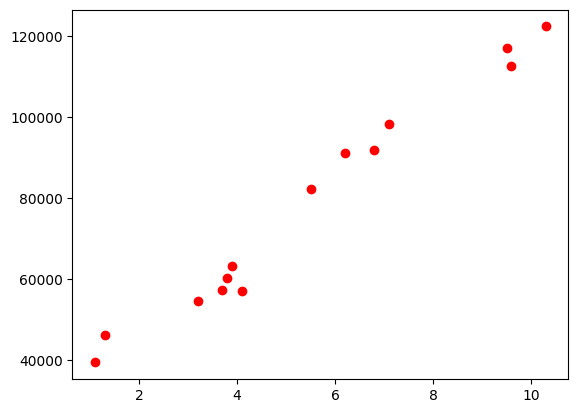

In [72]:
plt.scatter(X_test, Y_test, color="red")

This cell generates a scatter plot of the actual test data (red points) and overlays the predicted values (blue line) from the linear regression model. It also labels the axes and adds a title to the plot.

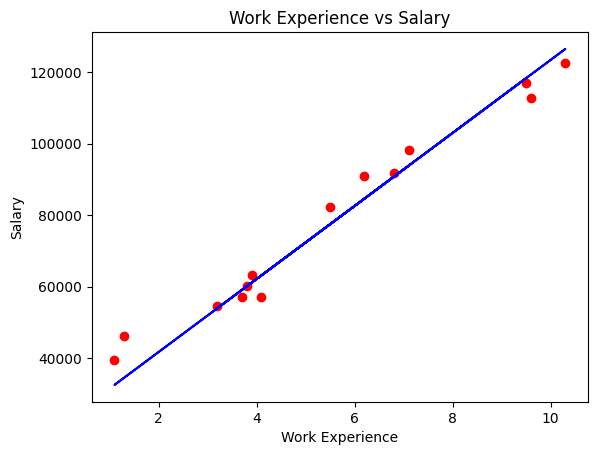

In [73]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, test_data_prediction, color="blue")
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Work Experience vs Salary')
plt.show()